In [ ]:
                                                                      PROGRAM-11

In [ ]:
Prepare a model for prediction of prostate cancer using KNN Classifier.

In [ ]:
CODE:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('c')

In [ ]:
df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [ ]:
df

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1.321756,7,60,4.385147,1
93,3.821004,3.896909,44,-1.386294,2.169054,7,40,4.684443,1
94,2.907447,3.396185,52,-1.386294,2.463853,7,10,5.143124,1
95,2.882564,3.773910,68,1.558145,1.558145,7,80,5.477509,1


In [ ]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [ ]:
#Feature Scaling
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(x),columns=df.columns[:-1])
df1.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.3,random_state=1)

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[18  4]
 [ 5  3]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.43      0.38      0.40         8

    accuracy                           0.70        30
   macro avg       0.61      0.60      0.60        30
weighted avg       0.69      0.70      0.69        30



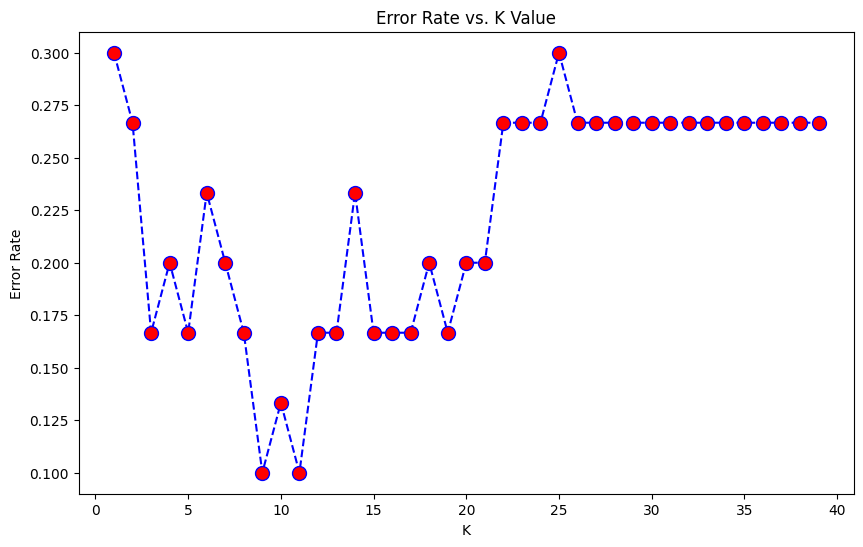

In [ ]:

#elbow method for calculating K
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()